<a href="https://colab.research.google.com/github/Leonardo-Dias-Up/GeoPandas/blob/main/Mapa_Usinas_de_Cana_de_A%C3%A7ucar_no_Brasil.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Instalando as bibliotecas
!pip install geopandas
!pip install haversine

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.0 MB 28.6 MB/s 
     |████████████████████████████████| 16.7 MB 48.7 MB/s 
     |████████████████████████████████| 6.3 MB 46.3 MB/s 
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
# Importando as bibliotecas
import geopandas as gpd
from shapely.geometry import Point, LineString, Polygon, MultiPolygon
import shapely.wkt
import shapely.geometry
from haversine import haversine, Unit, haversine_vector
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

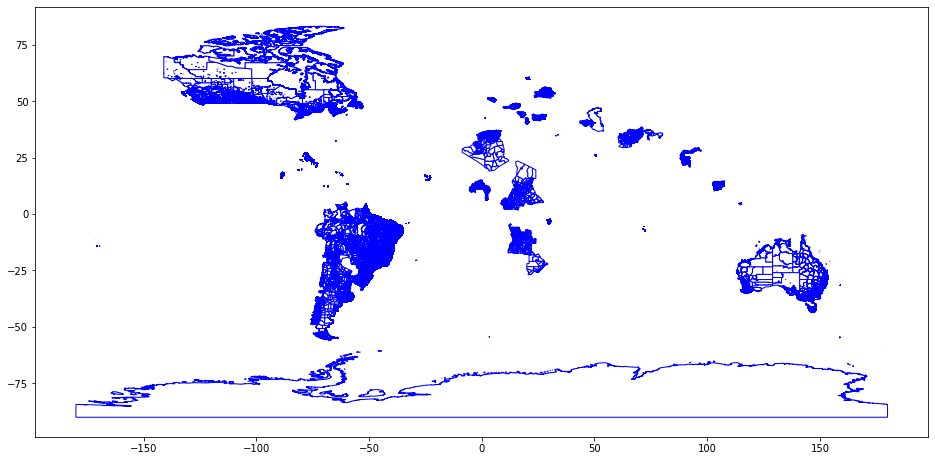

In [ ]:
# GeoDataFrame - Mundo - fonte de dados em www.gadm.org/data.html
Mundo = gpd.read_file('/content/drive/MyDrive/Colab Notebooks/Mapa Mundo/gadm404.shp',encoding="utf-8")
Mundo.plot(figsize=(16,8), facecolor='white', edgecolor='blue')

In [ ]:
# Filtrando apenas Brasil
Mundo['NAME_0'].unique()

array(['Afghanistan', 'Akrotiri and Dhekelia', 'Aksai Chin', 'Åland',
       'Albania', 'Algeria', 'American Samoa', 'Andorra', 'Angola',
       'Anguilla', 'Antarctica', 'Antigua and Barbuda', 'Argentina',
       'Armenia', 'Aruba', 'Arunachal Pradesh', 'Australia', 'Austria',
       'Azad Kashmir', 'Azerbaijan', 'Bahamas', 'Bahrain', 'Bangladesh',
       'Barbados', 'Belarus', 'Belgium', 'Belize', 'Benin', 'Bermuda',
       'Bhutan', 'Bolivia', 'Bonaire, Sint Eustatius and Saba',
       'Bosnia and Herzegovina', 'Botswana', 'Bouvet Island', 'Brazil',
       'British Indian Ocean Territory', 'British Virgin Islands',
       'Brunei', 'Bulgaria', 'Burkina Faso', 'Burundi', 'Cabo Verde',
       'Cambodia', 'Cameroon', 'Canada', 'Caspian Sea', 'Cayman Islands',
       'Central African Republic', 'Chad', 'Chile', 'China',
       'Christmas Island', 'Clipperton Island', 'Cocos Islands',
       'Colombia', 'Comoros', 'Cook Islands', 'Costa Rica',
       "Côte d'Ivoire", 'Croatia', 'Cuba', '

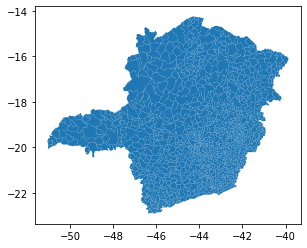

In [ ]:
# Filtrando apenas Brasil em específico Minas Gerais
Brasil = Mundo[Mundo['NAME_0'] == 'Brazil']
Brasil['NAME_1'].unique()

MG = Brasil[Brasil['NAME_1'] == 'Minas Gerais'] 
MG.plot()

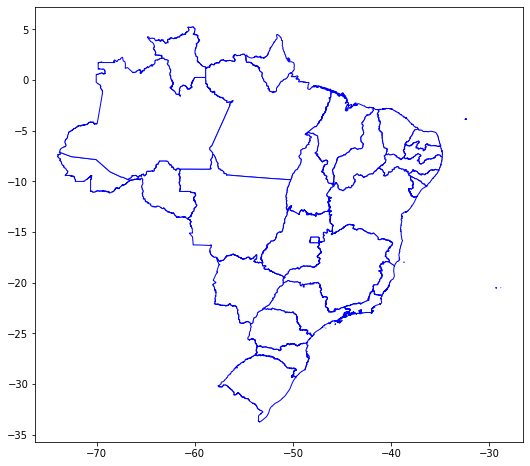

In [ ]:
# GeoDataFrame - Brasil Regioes - fonte de dados em www.ibge.gov.br/geociencias/downloads-geociencias.html
BrasilRegioes = gpd.read_file('/content/drive/MyDrive/Colab Notebooks/IBGE - Brasil Regiões/BR_UF_2021.shx',encoding="utf-8")
BrasilRegioes.plot(figsize=(16,8), facecolor='white', edgecolor='blue')

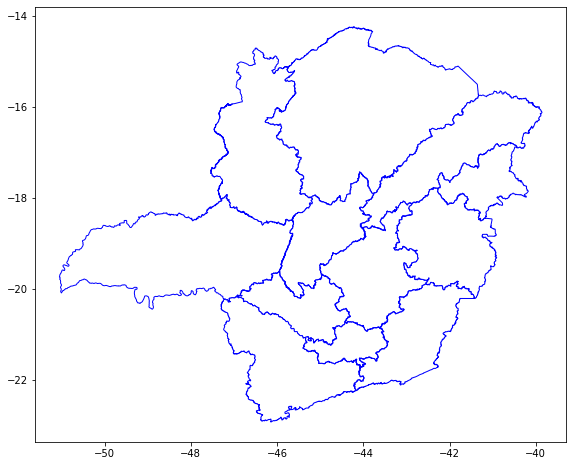

In [ ]:
# GeoDataFrame - Mesoregiões MG - fonte de dados em www.ibge.gov.br/geociencias/downloads-geociencias.html
MesoRegioes_MG = gpd.read_file('/content/drive/MyDrive/Colab Notebooks/IBGE - Mesoregiões MG/MG_Mesorregioes_2021.shx',encoding="utf-8")
MesoRegioes_MG.plot(figsize=(16,8), facecolor='white', edgecolor='blue')


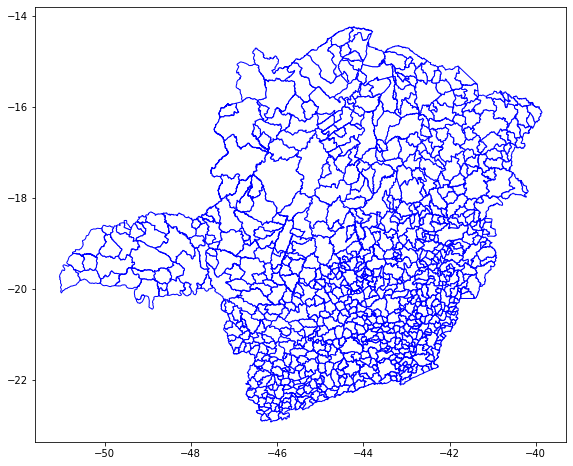

In [ ]:
# GeoDataFrame - Municipios MG
Municipios_MG = gpd.read_file('/content/drive/MyDrive/Colab Notebooks/IBGE - Municipios MG/MG_Municipios_2021.shp', encoding='utf-8')
Municipios_MG.plot(figsize=(16,8), facecolor='white', edgecolor='blue')
plt.show()


In [ ]:
# Filtrando apenas Mariana
Mariana = Municipios_MG[Municipios_MG['NM_MUN'] == 'Mariana']
Mariana.head()

,CD_MUN,NM_MUN,SIGLA,AREA_KM2,geometry
460,3140001,Mariana,MG,1194.208,"POLYGON ((-43.41795 -20.12345, -43.41779 -20.1..."


In [ ]:
# Salvar o gráfico em arquivo Json com coordenadas
caminho = '/content/drive/MyDrive/Colab Notebooks/IBGE - Municipios MG/Mariana_Mineracao.json'
Mariana.to_file(caminho, drive='GeoJSON')

In [ ]:
# Usinas de Cana de Açucar no Brasil - fonte dados em portaldeinformacoes.conab.gov.br/mapeamentos-agricolas-downloads.html
usinas_cana_de_açucar = gpd.read_file(r'/content/drive/MyDrive/Colab Notebooks/Usinas de Cana de Açúcar no Brasil/USINAS_CANA_BR_ATIVAS_2021.shx', encoding='utf-8')
usinas_cana_de_açucar = usinas_cana_de_açucar.dropna()
usinas_cana_de_açucar.head()

,UF,UNIDADE,PERFIL,LATITUDE,LONGITUDE,ID,geometry
0,SP,VIRGOLINO DE OLIVEIRA S.A. ACUCAR E ALCOOL (U...,USINA MISTA,-21.12940,-48.83430,0,POINT (-48.83430 -21.12940)
1,SP,USINA SANTA CRUZ S.A. ACUCAR E ALCOOL,USINA MISTA,-21.75450,-48.07930,1,POINT (-48.07930 -21.75450)
2,SP,USINA SAO JOSE DA ESTIVA S.A. ACUCAR E ALCOOL,USINA MISTA,-21.48558,-49.18713,2,POINT (-49.18713 -21.48558)
3,SP,USINA SANTA ISABEL LTDA.,USINA MISTA,-21.51049,-49.20992,3,POINT (-49.20992 -21.51049)
4,SP,IRMAOS MALOSSO LTDA.,DESTILARIA,-21.62772,-48.83048,4,POINT (-48.83048 -21.62772)


0      POINT (-48.83430 -21.12940)
1      POINT (-48.07930 -21.75450)
2      POINT (-49.18713 -21.48558)
3      POINT (-49.20992 -21.51049)
4      POINT (-48.83048 -21.62772)
                  ...             
319    POINT (-37.03961 -10.56131)
320    POINT (-37.03870 -10.56260)
321    POINT (-37.06117 -10.60457)
322    POINT (-37.11755 -10.48327)
323     POINT (-48.13965 -9.19370)
Name: geometry, Length: 324, dtype: geometry


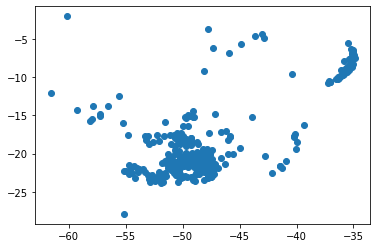

In [ ]:
# Plot Usinas de Cana de Açucar no Brasil
points = usinas_cana_de_açucar['geometry']
print(points)
xs = [point.x for point in points]
ys = [point.y for point in points]
plt.scatter(xs, ys)

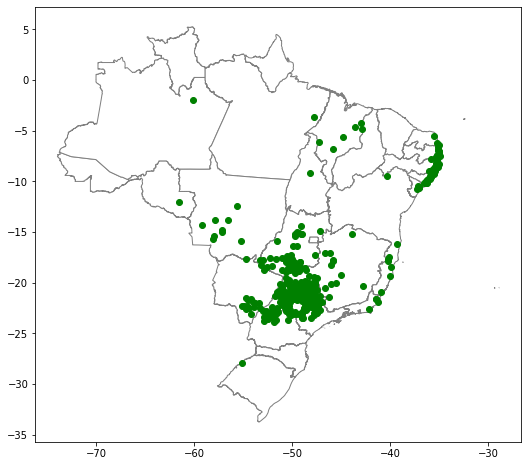

In [ ]:
# Plotado a nuvem de Usinas de Cana de Açucar no Brasil juntamente com o Mapa de Brasil
fig, ax = plt.subplots(figsize=(16,8))

BrasilRegioes.plot(ax=ax, facecolor='white', edgecolor='gray')
usinas_cana_de_açucar.plot(ax=ax, color='green') 

In [ ]:
# Conferindo a lib haversine
Mateus_Leme = (-19.96783, -44.44614)
Para_de_Minas = (-19.87823, -44.58229)
haversine(Mateus_Leme, Para_de_Minas)
print(haversine(Mateus_Leme, Para_de_Minas, unit=Unit.METERS))
print(haversine(Mateus_Leme, Para_de_Minas, unit=Unit.MILES))
print(haversine(Mateus_Leme, Para_de_Minas, Unit.NAUTICAL_MILES))

17373.69725111475
10.795514970372295
9.38104602400181


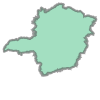

In [ ]:
# Poligono do Mapa de Brasil
polygon = BrasilRegioes.iloc[16].geometry
polygon



In [ ]:
# Intersecção entre os Usinas de Cana de Açucar no Brasil e o Mapa de Brasil
usinas_cana_de_açucar_intersc = usinas_cana_de_açucar[usinas_cana_de_açucar.intersects(polygon)]
usinas_cana_de_açucar_intersc

,UF,UNIDADE,PERFIL,LATITUDE,LONGITUDE,ID,geometry
204,MG,USINA CORURIPE ACUCAR E ALCOOL S.A.,DESTILARIA,-19.52233,-50.65930,204,POINT (-50.65930 -19.52233)
205,MG,USINA CORURIPE ACUCAR E ALCOOL S.A.,USINA MISTA,-19.70861,-50.33832,205,POINT (-50.33832 -19.70861)
206,MG,USINA SANTO ANGELO LTDA. ACUCAR E ALCOOL,USINA MISTA,-19.96066,-48.56695,206,POINT (-48.56695 -19.96066)
207,MG,USINA FRUTAL ACUCAR E ALCOOL LTDA. BUNGE,USINA MISTA,-20.08255,-48.82075,207,POINT (-48.82075 -20.08255)
208,MG,USINA ITAPAGIPE ACUCAR E ALCOOL LTDA. BUNGUE,USINA MISTA,-19.88928,-49.68950,208,POINT (-49.68950 -19.88928)
209,MG,USINA CORURIPE ACUCAR E ALCOOL S.A. UNIDADE CA...,USINA MISTA,-19.81292,-48.73901,209,POINT (-48.73901 -19.81292)
210,MG,USINA DELTA S.A.,USINA MISTA,-19.97555,-47.76833,210,POINT (-47.76833 -19.97555)
211,MG,USINA DELTA S.A.,USINA MISTA,-19.97990,-48.26450,211,POINT (-48.26450 -19.97990)
212,MG,USINA CERRADAO LTDA.,DESTILARIA,-19.92486,-49.15367,212,POINT (-49.15367 -19.92486)
213,MG,USINA DELTA S.A. . USINA MENDONCA AGROINDUSTRIAL,SEM INFO.,-20.02103,-47.62608,213,POINT (-47.62608 -20.02103)


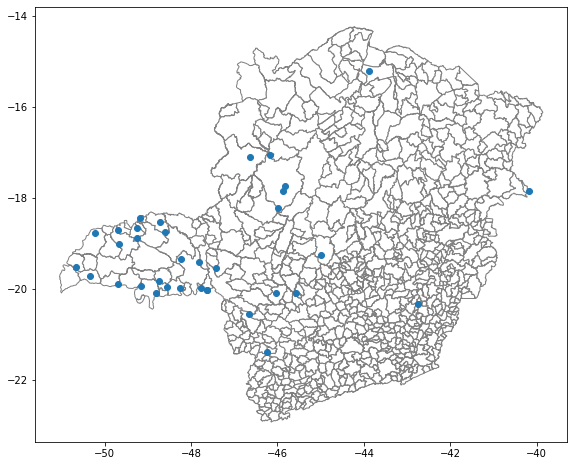

In [ ]:
# Plotado a nuvem de Usinas de Cana de Açucar no Brasil juntamente com o Mapa de Brasil
fig, ax = plt.subplots(figsize=(16,8))

Municipios_MG.plot(ax=ax, facecolor='white', edgecolor='gray')
usinas_cana_de_açucar_intersc.plot(ax=ax)

In [ ]:
# Salvar o gráfico em arquivo Json com coordenadas
caminho = '/content/drive/MyDrive/Colab Notebooks/Prefeitura BH/usinas_cana_de_açucar_MG.json'
usinas_cana_de_açucar_intersc.to_file(caminho, drive='GeoJSON')